### Counting Words

Begin by enabling plots to be displayed in the Jupyter notebook, making them look nice with seaborn, and importing the pandas library for data management.

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns

The sample text for this section is from the UN General Debate Corpus. These were released on [kaggle](https://www.kaggle.com/unitednations/un-general-debates/home). Since CSV files aren't really well-designed to hold long text fields with line-breaks, quotation marks and commas (which might interpretated by a csv reader as the start of a new field), the addresses are in the json file format.

In [2]:
un_df = pd.read_json('data/un-general-debates.json')

We can use `info`, `describe`, and `sample` to get a sense of the data.

In [3]:
un_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         3214 non-null   int64 
 1   speech_year   3214 non-null   int64 
 2   country_code  3214 non-null   object
 3   speech_text   3214 non-null   object
dtypes: int64(2), object(2)
memory usage: 125.5+ KB


In [4]:
un_df.describe()

,index,speech_year
count,3214.000000,3214.000000
mean,3417.843808,1989.961419
std,2048.354531,5.787857
min,0.000000,1980.000000
25%,1767.250000,1985.000000
50%,3487.500000,1990.000000
75%,5566.750000,1995.000000
max,6808.000000,1999.000000


In [5]:
un_df.sample(5)

,index,speech_year,country_code,speech_text
2891,6366,1990,YEM,﻿\nIt gives me great pleasure to extend to the...
2436,5593,1993,WSM,It is always an honour and\na great pleasure t...
639,1408,1996,LIE,﻿At the outset I should like\nto congratulate ...
2665,5962,1981,WSM,"Mr. President, my delegation is pleased indeed..."
536,991,1986,NER,"On 24 October 1985, the community of nations c..."


### Word Count

One the simplest things one might want to know about text is how long is it. This could be useful for basic descriptive questions, such as "Have UN speeches increased in length over time?" Word counts are also useful for normalized texts. A 200 word essay with 10 exclamation marks is quite different from a 20,000 word essay with 10 exclamation marks.

A function to count words is not included in any of the standard Python data analsyis libraries. You could write your own by using `.split()` to turn a text string into a list based on white-spaces and then `len()` to compute the length of the newly-created list. We saved you a bit of this hassle by including a word counter as part of our `pdtext` package. You might need to install `pip` install it first.

In [6]:
from pdtext.tf import word_count

In [7]:
sentence = "Protesters were met with force outside the Waffle House."

In [8]:
word_count(sentence)

9

### Word Count Excercise 1

Create a new sentence stored as a string. Count the words.  



Now that the function has been imported, it can applied to our text variable, such as `speech_text` to create a new variable with the number of words in the address.

In [9]:
un_df['speech_word_count'] = un_df['speech_text'].apply(word_count)

We can use the `describe`, `hist`, and `scatter` to provide some information on the new variable.

In [10]:
un_df['speech_word_count'].describe()

count     3214.000000
mean      3273.919726
std       1117.532078
min        462.000000
25%       2500.750000
50%       3148.500000
75%       3898.500000
max      10007.000000
Name: speech_word_count, dtype: float64

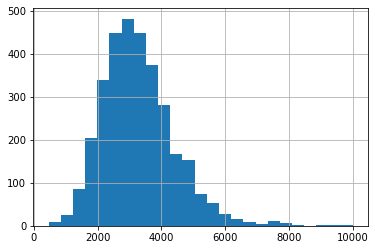

In [11]:
un_df['speech_word_count'].hist(bins = 25)

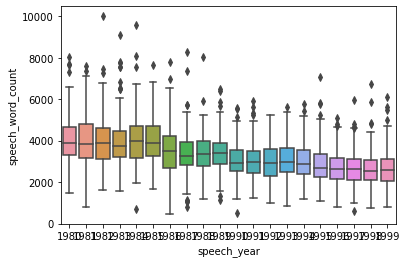

In [12]:
sns.boxplot(x = "speech_year", 
            y = "speech_word_count",
            data =un_df);

The dataset can be subset to just a few informative columns and then the `sort_values` and `head`/`tail` methods can list the longest and shortest addresses.

In [13]:
un_df.sort_values(by='speech_word_count').head(10)

,index,speech_year,country_code,speech_text,speech_word_count
538,993,1986,VCT,On behalf of the Government and people of Sai...,462
2959,6434,1990,DDR,"﻿Mr. President, I wish to thank you on behalf ...",493
928,1892,1997,SYC,"﻿I take this opportunity to congratulate you, ...",597
1175,2469,1984,STP,﻿The established practice in the United Nation...,713
2064,4130,1998,BRN,I\nextend my congratulations to Mr. Opertti on...,735
648,1417,1996,PLW,﻿It is my distinct honour to\naddress the Unit...,779
1839,3905,1987,BGD,"﻿Mr. President, it is a marvellous feeling, on...",781
1733,3614,1999,PER,"The\ndelegation of Peru is greatly pleased, Si...",787
2631,5928,1981,STP,147.\t Once a year the great family of Members...,794
2413,5570,1993,MCO,"For me this is a very special occasion, for it...",860


In [14]:
un_df.sort_values(by='speech_word_count', ascending=False).head(10)

,index,speech_year,country_code,speech_text,speech_word_count
1988,4054,1982,PAN,"Mr. President, your many years of association ...",10007
1177,2471,1984,IRL,﻿104. I have the honour of addressing the Gene...,9612
1571,3308,1983,PRY,"﻿238.\tMr. President, my first words will\nbe ...",9115
1801,3867,1987,IRN,"﻿O Lord, with Thy holy name I begin and from T...",8271
1156,2450,1984,RUS,"﻿Mr. Lusaka, I congratulate you on your electi...",8069
1047,2152,1988,GRC,﻿On behalf of the European Community and its m...,8050
2284,4731,1980,LUX,﻿Since Luxembourg is President of the Council ...,8043
572,1027,1986,IRN,I have great pleasure in extending to Mr. Cho...,7814
1549,3286,1983,COD,"﻿173.\tFirst of all, Sir, on behalf of the del...",7809
1565,3302,1983,IRN,﻿ 'Those not following the true path of God ex...,7768


We can also display the first four hundred characters of the longest speech, using the index value from the table above.

In [15]:
print(un_df.iloc[1988]['speech_text'][:400])

Mr. President, your many years of association 
with the United Nations, during which you have 
demonstrated your wisdom, spirit of co-operation 
and human qualities, have earned you your 
election, which guarantees the successful outcome 
of our work for all States Members of the United 
Nations. We welcome your presidency of the 
General Assembly and should like to pledge the 
determined co-opera


## Word Count Excercise 2

In the "data" folder, there is a file called "wine_reviews.csv" which contains written reviews (`description`) and scores (`points`, `rating`).
What is the average (median) number of words in a review? Make a histogram of the length distribution.



# Word frequencies

Word frequencies are the backbone of almost all text analysis. From topic models to text classification, counting how often certain words occur is a critical step in quantifying texts. While it is certainly possible to compute word frequencies using your own functions, that is usually unnecessary, as many Python libraries can compute words frequencies. 


Like all frequency tables, it is possible to create word frequency tables in either wide or long form. If you don't really care about which specific words are in a text, but are mostly using them for subsequent statistical analysis, you'll likely need them in the first, wide format. Here, each text is a row and each word a variable. This is the modal format for how text is interpreted as numbers. 

*The paper and pencil sat idle on the desk.*

| and | desk | idle | on | paper | pencil | sat | the |
|----:|-----:|-----:|---:|------:|-------:|----:|----:|
| 1   | 1    | 1    | 1  | 1     | 1      | 1   | 2   |

Alternatively, if you want to know about which specific words, or types of words, are most common, you might favor the second, long approach. 

| word   | freq |
|--------|------|
| the    | 2    |
| sat    | 1    |
| pencil | 1    |
| paper  | 1    |
| on     | 1    |
| idle   | 1    |
| desk   | 1    |
| and    | 1    |

In either case, we are disregarding the word order in the original sentence. With few notable exceptions, analysts take what is called a *bag-of-words* approach. This simplifying assumption, that word order doesn't really matter, has two things going for it. First, it is computationally much easier to assume that order of words in a sentence doesn't matter. Second, the results, as you will see, are often pretty solid. Fields like sociology, which are based on the idea that individuals are shaped by their surroundings, analyze individual survey data frequently to great success. Bag-of-words is like that. We know context matters, but modeling strategies that ignore this can still provide fairly good estimates.

In your analysis, you will likely use the [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html?highlight=count%20vectorizer#sklearn.feature_extraction.text.CountVectorizer) included with scikit-learn. We'll discuss how to make use of the `CountVectorizer` later on the the Analysis section of the book. For now, we'll import the `make_wf_df` function from `pdtext` to make the logic of turning word counts into datasets a little more straightforward. 

In [16]:
from pdtext.tf import make_wf_df

We start off with some sample sentences.

In [17]:
sentences = [
    "Unequal exchange is ruining and impoverishing our peoples and must cease.",
    "Arms expenditures are irrational.",
    "They must cease and the funds thus released must be used to finance development.",
]

In [18]:
wf_df = make_wf_df(sentences)
wf_df

,and,are,arms,be,cease,development,exchange,expenditures,finance,funds,...,our,peoples,released,ruining,the,they,thus,to,unequal,used
Unequal exchange is ruining and impoverishing our peoples and must cease.,2,0,0,0,1,0,1,0,0,0,...,1,1,0,1,0,0,0,0,1,0
Arms expenditures are irrational.,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
They must cease and the funds thus released must be used to finance development.,1,0,0,1,1,1,0,0,1,1,...,0,0,1,0,1,1,1,1,0,1


The resulting dataframe has a column for each unique word:

We can create a variable in the dataframe with the original texts. Since `sentences` is a list of two items, and because we know the the order of `sentences` matches the order of `df`, it is fairly straightfoward to add the new column.

### Word Frequencies Exercise 1

Create a word frequency dataframe based on the following sentences.


In [19]:
seuss_sen = ['This one has a little star.', 
            'This one has a little car.', 
            'Say!',
            'What a lot of fish there are.']

If, instead, we wanted the most frequent words, we could use the `summary` option.

In [20]:
make_wf_df(['The paper and pencil sat idle on the desk'], summary = True)

the       2
sat       1
pencil    1
paper     1
on        1
idle      1
desk      1
and       1
dtype: int64

### Word Frequencies Exercise 2

Create a word frequency datframe from our Suess sentences.


We can now create a new dataframe based on the UN texts. We'll start by using `make_wf_df` to convert the `speech_text` in the UN speeches dataframe into its own dataset. 

In [21]:
un_wf = make_wf_df(un_df['speech_text'])

This rebuilt our vocabulary list, which is now much longer.

In [22]:
len(un_wf.keys())

41133

We can use slice to examine an arbitrary section of the vocabulary.

In [23]:
un_wf.keys()[11510:11520]

Index(['discontinuance', 'discontinuation', 'discontinue', 'discontinued',
       'discontinuing', 'discontinuities', 'discontinuity', 'discord',
       'discordant', 'discords'],
      dtype='object')

In [24]:
un_wf.head()

0  00  000  0001  \
speech_text                                                            
﻿It is indeed a pleasure for me and the members...  2   0    0     0   
﻿\nMay I begin by congratulating you. Sir, on y...  1   0    2     0   
﻿\nMr. President, it is a particular pleasure f...  0   0    0     0   
﻿\nDuring the debate at the fortieth session of...  0   0    0     0   
﻿I should like at the outset to express my dele...  0   0    0     0   

                                                    000yearlong  001  006  \
speech_text                                                                 
﻿It is indeed a pleasure for me and the members...            0    0    0   
﻿\nMay I begin by congratulating you. Sir, on y...            0    0    0   
﻿\nMr. President, it is a particular pleasure f...            0    0    0   
﻿\nDuring the debate at the fortieth session of...            0    0    0   
﻿I should like at the outset to express my dele...            0    0    0   

                                                    007  009  00tmunity  ...  \
speech_text                                                              ...   
﻿It is indeed a pleasure for me and the members...    0    0          0  ...   
﻿\nMay I begin by congratulating you. Sir, on y...    0    0          0  ...   
﻿\nMr. President, it is a particular pleasure f...    0    0          0  ...   
﻿\nDuring the debate at the fortieth session of...    0    0          0  ...   
﻿I should like at the outset to express my dele...    0    0          0  ...   

                                                    у  хxi24  ч  ш  ш1оп  \
speech_text                                                                
﻿It is indeed a pleasure for me and the members...  0      0  0  0     0   
﻿\nMay I begin by congratulating you. Sir, on y...  0      0  0  0     0   
﻿\nMr. President, it is a particular pleasure f...  0      0  0  0     0   
﻿\nDuring the debate at the fortieth session of...  0      0  0  0     0   
﻿I should like at the outset to express my dele...  0      0  0  0     0   

                                                    ш1ь1а  щ  ь  ьо1л  ю  
speech_text                                                               
﻿It is indeed a pleasure for me and the members...      0  0  0     0  0  
﻿\nMay I begin by congratulating you. Sir, on y...      0  0  0     0  0  
﻿\nMr. President, it is a particular pleasure f...      0  0  0     0  0  
﻿\nDuring the debate at the fortieth session of...      0  0  0     0  0  
﻿I should like at the outset to express my dele...      0  0  0     0  0  

[5 rows x 41133 columns]

Using `sort_values`, we can take a look at the 20 most frequently occuring words in the vocabulary. 

In [25]:
un_wf.sum().sort_values(ascending=False)[:20]

the              953974
of               581983
and              388253
to               356527
in               260725
a                167747
that             145924
is               116177
for              114432
we               101063
on                80242
this              73210
be                68613
it                67062
as                64444
by                64424
with              62555
our               62228
nations           60855
international     59858
dtype: int64

We can create a new dataframe merging our better word frequencies with the original UN dataframe. The `concat` method from pandas takes a list of dataframes and merges them. The value of `axis=1` means that datasets should be merged sided by side -- each data set is providing new columns, not new rows. Critically, `concat` assumes that the cases are in the same order in each of the dataframes. If this is not the case (or you are not sure), and you are merging based on a the value of column, you should use `merge`.

In [26]:
df_combined = pd.concat([un_df, un_wf], axis=1)

In [27]:
df_combined.head()

,index,speech_year,country_code,speech_text,speech_word_count,0,00,000,0001,000yearlong,...,у,хxi24,ч,ш,ш1оп,ш1ь1а,щ,ь,ьо1л,ю
0,0.0,1989.0,MDV,﻿It is indeed a pleasure for me and the member...,3008.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1989.0,FIN,"﻿\nMay I begin by congratulating you. Sir, on ...",2723.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1989.0,NER,"﻿\nMr. President, it is a particular pleasure ...",4850.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1989.0,URY,﻿\nDuring the debate at the fortieth session o...,2699.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1989.0,ZWE,﻿I should like at the outset to express my del...,4541.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If you wanted to stop here, either to pick up your analysis on a different day or to complete your work in a different program, you could export the combined dataframe. If you wanted to keep the address text in your file, best practice would be to store the file in JSON format, to avoid potential issues with that particularly long text field. Using `orient='records'` ensures each item in the JSON is its own case. 

In [28]:
# df_combined.to_json('un_wf.json', orient='records')

Alternatively, if you didn't care about the text, or you already had it saved in the original json file, you can drop the text field and export to a csv file. Setting `axis=1` tells pandas that you want to drop a column, rather than a row.

In [ ]:
# df_combined.drop('speech_text', axis=1).to_csv('sotu_wf.csv')

### Word Frequency Exercise 3

What were the most common words used in wine reviews?


An alternate strategy to remove words entirely involves constructing weights based on word frequency in a particular document versus word frequency in other documents. As an example, a word like "of" would score low in every document if it was commonly found, and used in similar frequencies, across documents. On the other hand, a word like "America" might be used in every text, but some addresses might use it more frequently, it which case it would score high in just those instances. Finally, the highest scores would be associated with a word like "terrorism", which would not only occur in a small proportion of addresses, but also appear frequently in the few addresses that include it.  

The most common algorithm for this sort of word weight is called term-frequency/inverse document frequency, or TF-IDF. The numerator, term frequency, is how frequently a word occurs in a document divided by the number of words in the document. The denominator is the natural log of the fraction of the total number of documents divided by the number of documents with term in it. 

Returning to our two sample sentences:

Using `pdtext`, we can generate TF-IDF word weights by setting `tfidf = True`. Scikit-learn's [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tfidfvectorizer#sklearn.feature_extraction.text.TfidfVectorizer) can also be used to compute tf-idfs, with  syntax identical to that used for the `CountVectorizer`. We'll go over `TfidfVectorizer` in more detail in the chapter covering text classification.

![](http://dovgalecs.com/blog/wp-content/uploads/2012/03/img131.gif)

In [29]:
make_wf_df(sentences, tfidf = True)


,and,are,arms,be,cease,development,exchange,expenditures,finance,funds,...,our,peoples,released,ruining,the,they,thus,to,unequal,used
Unequal exchange is ruining and impoverishing our peoples and must cease.,0.470070,0.0,0.0,0.000000,0.235035,0.000000,0.309043,0.0,0.000000,0.000000,...,0.309043,0.309043,0.000000,0.309043,0.000000,0.000000,0.000000,0.000000,0.309043,0.000000
Arms expenditures are irrational.,0.000000,0.5,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
They must cease and the funds thus released must be used to finance development.,0.207216,0.0,0.0,0.272464,0.207216,0.272464,0.000000,0.0,0.272464,0.272464,...,0.000000,0.000000,0.272464,0.000000,0.272464,0.272464,0.272464,0.272464,0.000000,0.272464


As before, we can create apply the vectorizer to the UN addresses. 

In [30]:
un_tfidf_df = make_wf_df(un_df['speech_text'], tfidf = True)



In [33]:
un_tfidf_df

0   00       000  \
speech_text                                                                   
﻿It is indeed a pleasure for me and the members...  0.016978  0.0  0.000000   
﻿\nMay I begin by congratulating you. Sir, on y...  0.009820  0.0  0.014246   
﻿\nMr. President, it is a particular pleasure f...  0.000000  0.0  0.000000   
﻿\nDuring the debate at the fortieth session of...  0.000000  0.0  0.000000   
﻿I should like at the outset to express my dele...  0.000000  0.0  0.000000   
...                                                      ...  ...       ...   
I should like to congratulate\nMr. Essy on his ...  0.000000  0.0  0.000000   
It is with pleasure that I begin this speech by...  0.000000  0.0  0.000000   
Allow me first of all, Sir, to congratulate you...  0.000000  0.0  0.018160   
It is a great pleasure to attend the beginning ...  0.000000  0.0  0.000000   
Your election,\nSir, to the presidency of the f...  0.000000  0.0  0.009331   

                                                    0001  000yearlong  001  \
speech_text                                                                  
﻿It is indeed a pleasure for me and the members...   0.0          0.0  0.0   
﻿\nMay I begin by congratulating you. Sir, on y...   0.0          0.0  0.0   
﻿\nMr. President, it is a particular pleasure f...   0.0          0.0  0.0   
﻿\nDuring the debate at the fortieth session of...   0.0          0.0  0.0   
﻿I should like at the outset to express my dele...   0.0          0.0  0.0   
...                                                  ...          ...  ...   
I should like to congratulate\nMr. Essy on his ...   0.0          0.0  0.0   
It is with pleasure that I begin this speech by...   0.0          0.0  0.0   
Allow me first of all, Sir, to congratulate you...   0.0          0.0  0.0   
It is a great pleasure to attend the beginning ...   0.0          0.0  0.0   
Your election,\nSir, to the presidency of the f...   0.0          0.0  0.0   

                                                    006  007  009  00tmunity  \
speech_text                                                                    
﻿It is indeed a pleasure for me and the members...  0.0  0.0  0.0        0.0   
﻿\nMay I begin by congratulating you. Sir, on y...  0.0  0.0  0.0        0.0   
﻿\nMr. President, it is a particular pleasure f...  0.0  0.0  0.0        0.0   
﻿\nDuring the debate at the fortieth session of...  0.0  0.0  0.0        0.0   
﻿I should like at the outset to express my dele...  0.0  0.0  0.0        0.0   
...                                                 ...  ...  ...        ...   
I should like to congratulate\nMr. Essy on his ...  0.0  0.0  0.0        0.0   
It is with pleasure that I begin this speech by...  0.0  0.0  0.0        0.0   
Allow me first of all, Sir, to congratulate you...  0.0  0.0  0.0        0.0   
It is a great pleasure to attend the beginning ...  0.0  0.0  0.0        0.0   
Your election,\nSir, to the presidency of the f...  0.0  0.0  0.0        0.0   

                                                    ...    у  хxi24    ч    ш  \
speech_text                                         ...                         
﻿It is indeed a pleasure for me and the members...  ...  0.0    0.0  0.0  0.0   
﻿\nMay I begin by congratulating you. Sir, on y...  ...  0.0    0.0  0.0  0.0   
﻿\nMr. President, it is a particular pleasure f...  ...  0.0    0.0  0.0  0.0   
﻿\nDuring the debate at the fortieth session of...  ...  0.0    0.0  0.0  0.0   
﻿I should like at the outset to express my dele...  ...  0.0    0.0  0.0  0.0   
...                                                 ...  ...    ...  ...  ...   
I should like to congratulate\nMr. Essy on his ...  ...  0.0    0.0  0.0  0.0   
It is with pleasure that I begin this speech by...  ...  0.0    0.0  0.0  0.0   
Allow me first of all, Sir, to congratulate you...  ...  0.0    0.0  0.0  0.0   
It is a great pleasure to attend the beginning ...  ...  0.0    0.0  0.0  0.0   
You

### Word Frequencies Exercise 4

Create a tf-idf dataframe from the wine speeches.
